# Otimização Multiobjetivo

<a href="https://colab.research.google.com/github/glaucogoncalves/nio/blob/main/lectures/05_01_Otimizacao_Multiobjetivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparação

In [ ]:
!pip install -q pyomo
!wget -N -q "https://minlp.com/downloads/xecs/baron/current/baron-lin64.zip"
!unzip baron-lin64.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
Archive:  baron-lin64.zip
   creating: baron-lin64/
  inflating: baron-lin64/README.txt  
  inflating: baron-lin64/BARON EULA.pdf  
  inflating: baron-lin64/baron       
  inflating: baron-lin64/baron manual.pdf  
   creating: baron-lin64/examples/
  inflating: baron-lin64/examples/nlp3.bar  
  inflating: baron-lin64/examples/robot.bar  
  inflating: baron-lin64/examples/gear.bar  
  inflating: baron-lin64/examples/scqp1.bar  
  inflating: baron-lin64/examples/pool1.bar  
  inflating: baron-lin64/examples/nlp1.bar  
  inflating: baron-lin64/examples/milp.bar  
  inflating: baron-lin64/examples/minlp.bar  
  inflating: baron-lin64/examples/gear20.bar  
  inflating: baron-lin64/examples/nlp2.bar  
  inflating: baron-lin64/examples/iqp1.bar  


## Introdução

Até aqui vimos a modelagem e diferentes formas de solução de problemas com apenas uma função objetivo. O desejado, nestes casos, é obtermos um único valor ótimo global (um escalar). Mas o que acontece quando temos múltiplos objetivos? Neste caso, <u>a solução das múltiplas funções objetivo formam um vetor</u> (por isso, a otimização multiobjetivo pode ser chamada também de otimização vetorial).

Formalmente, um problema de otimização multiobjetivo pode ser descrito por

$
\displaystyle\min_{\boldsymbol{x} \in \mathbb{R}^D} \boldsymbol{f}(\mathbf{x}) = [f_1(\mathbf{x}),f_2(\mathbf{x}),\ldots,f_M(\mathbf{x})] \\
s.t. \\
g_j(\mathbf{x}) \leq 0, \; j = 1,2,\ldots,J \\
h_k(\mathbf{x}) = 0, \; k = 1,2,\ldots,K
$

onde $\mathbf{x} = (x_1,x_2,\ldots,x_D)^T$ é o vetor de variáveis de decisão.

Das formulações monoobjetivo, sabemos que o espaço $\mathcal{F} = \mathbb{R}^D$ coberto pelos vetores das variáveis de decisão $\mathbf{x}$ é chamado de <u>espaço de busca</u>. Por outro lado, nos problemas multiobjetivo, o espaço $\mathcal{S} = \mathbb{R}^M$ formado por todos os valores possíveis das funções objetivo é chamado de <u>espaço de resposta</u> ou <u>espaço objetivo</u>.

Deve-se observar que, comparado ao caso monoobjetivo que possui um espaço de objetivo comumente em $\mathbb{R}$, <u>o espaço objetivo nos problemas multiobjetivo tende a ser muito amplo</u>. Além disso, <u>problemas multiobjetivo não necessariamente tem uma única solução ótima que otimiza todas as funções simultaneamente</u>.

De forma ingênua, pode-se pensar o seguinte: se tentarmos otimizar cada objetivo individualmente, de modo que cada um atinja o seu melhor, nós teríamos o seguinte <u>vetor objetivo</u> ideal $\mathbf{f^*} = (f_1^*,f_2^*,\ldots,f_M^*)$.

Contudo, uma solução que corresponda a este vetor ideal não existe na prática, já que a solução $\mathbf{x}^*$ que é ponto de ótimo de uma função $f_i$ não é necessariamente um ponto de ótimo em outra função $f_j$.

Além do mais, objetivos diferentes frequentemente conflitam entre si, fazendo com que conforme nos aproximamos do ótimo global em uma função, nos afastemos do ótimo global em outra.

---

**Exemplo 1**: Queremos comer em um restaurante da mais alta qualidade (maximizar a qualidade) e ao mesmo tempo queremos o mais barato possível (minimizar o custo). O serviço de alta qualidade vai nos custar mais, criando o conflito.

**Exemplo 2**: Queremos que nosso sistema seja robusto a falhas o que exige maior redundância (minimizar o risco de falhas) e ao mesmo tempo queremos que ele gaste pouca energia (minimizar consumo energético). Mais componentes redundantes operando ao mesmo tempo demandam maior consumo energético, o que cria o conflito.

---

## Fronteira de Pareto e Otimalidade de Pareto

Em um problema multiobjetivo, embora haja um número de soluções que podem ser "vencedoras" - no sentido de que melhoram um pouco uma função objetivo enquanto pioram outra, e vice-versa -, há um número ainda maior de soluções "perdedoras", isto é, que não estão próximas dos ótimos globais de cada uma das funções.

Para entender melhor essa ideia, olhemos a figura abaixo onde vemos os gráficos de contorno das funções $f_1(x,y) = \frac{x^2}{4} + \frac{y^2}{2} + 2x -3y$ (em azul) e $f_2(x,y) = \frac{x^2}{2} + y^2 - 2x +6y$ (em verde), que queremos minimizar. O gráfico mostra ainda (em vermelho) algumas soluções dispersas (estas são "perdedoras") e uma linha tracejada ligando os pontos de ótimo das funções e indicando um conjunto de soluções (estas são "vencedoras").

Deste exemplo podemos destacar os seguintes aspectos:

1. A linha tracejada mostra <u>um número infinito de soluções "vencedoras"</u>. Tais <u>soluções buscam uma espécie de compromisso</u> entre as funções $f_1$ e $f_2$. Tente imaginar um ponto qualquer na linha. Este ponto tem ao mesmo tempo uma certa distância $d_1$ para o ponto de ótimo de $f_1$ e uma distância $d_2$ para o ponto de ótimo em $f_2$. Assim, conforme caminhamos sobre a linha nos afastando de $f_1$, aumentamos $d_1$ e diminuimos $d_2$; indo no sentido contrário, diminuimos $d_1$ e aumentamos $d_2$.
2. Qualquer <u>solução fora da linha é "perdedora"</u>. Podemos ver isso escolhendo um ponto que esteja sobre uma curva de nível de $f_1$ (o ponto mais a esquerda, por exemplo). A partir deste ponto, mantendo-se sobre a curva de nível, podemos nos aproximar do ponto de ótimo de $f_2$. Seguindo esta curva, veremos que o ponto que minimiza $f_2$, mantendo-se sobre a curva de nível escolhida em $f_1$, é um ponto sobre a reta tracejada. Por isso, o ponto sobre a reta "vence" em relação aos outros pontos.

Esta intuição de "vencedor/perdedor" é formalizada no conceito de **dominância** de entre soluções.

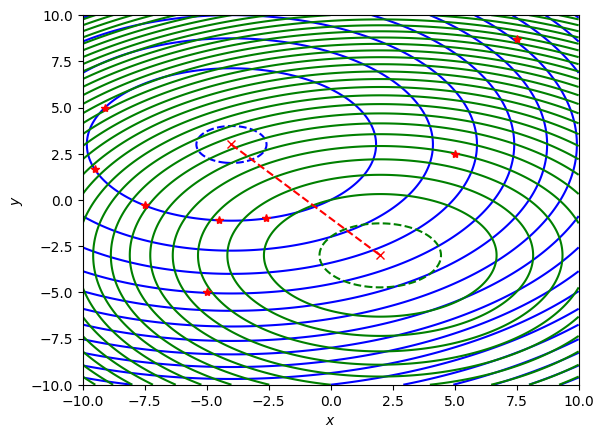

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = 1000
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
xv, yv = np.meshgrid(x, y)
f1 = xv**2/4 + yv**2/2 + 2*xv -3*yv
f2 = xv**2/2 + yv**2 - 2*xv + 6*yv

plt.contour(x,y,f1,levels=20,colors="blue")
plt.contour(x,y,f2,levels=30,colors="green")

plt.plot(-9.1,5,'*',color="red")
plt.plot(-9.5,1.7,'*',color="red")
plt.plot(-7.5,-0.3,'*',color="red")
plt.plot(-4.5,-1.1,'*',color="red")
plt.plot(-2.6,-1,'*',color="red")
plt.plot(-5,-5,'*',color="red")
plt.plot(7.5,8.7,'*',color="red")
plt.plot(5,2.5,'*',color="red")

#y = -x - 1
plt.plot(-4,3,'x',color="red")
plt.plot(2,-3,'x',color="red")
plt.plot([-4,2],[3,-3],'--',color="red")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

### Dominância entre soluções


Considerando um <u>problema de minimização</u>, um **vetor objetivo** $\mathbf{u} = (u_1,\ldots,u_M)^T \in \mathcal{S}$ **domina** (representado por $\mathbf{u} \prec \mathbf{v}$) o vetor objetivo $\mathbf{v} = (v_1,\ldots,v_M)^T$, **se e somente se**, $u_i \leq v_i \; \forall i \in \{1,\ldots,M\}$ e $\exists i \in \{1,\ldots,M\} : u_i \lt v_i$. Em outras palavras, podemos dizer que <u>nenhum componente de $\mathbf{u}$ é maior que o componente correspondente em $\mathbf{v}$ e ao menos um componente é menor</u>.

Observe que este conceito de dominância pode ser <u>estendido aos vetores de solução</u>. Assim um vetor solução $\mathbf{x} = (x_1,\ldots,x_D)^T \in \mathcal{F}$ domina o vetor $\mathbf{x'} = (x'_1,\ldots,x'_D)^T$, se e somente se, $\mathbf{f(x)} \prec \mathbf{f(x')}$.

Pode-se fazer análises similares para maximização.


Em resumo, $\mathbf{x} \prec \mathbf{x'}$ significa que $\mathbf{x}$ domina $\mathbf{x'}$, ou que $\mathbf{x'}$ é dominado por $\mathbf{x}$. Em termos práticos, podemos dizer que $\mathbf{x}$ é não-inferior a $\mathbf{x'}$ (i.e., $\mathbf{x}$ é melhor ou não pior que $\mathbf{x'}$) ou podemos dizer, informalmente, que $\mathbf{x}$ é melhor $\mathbf{x'}$.

O conceito de dominância é uma forma segura de comparar soluções para problemas de otimização e o objetivo da otimização multiobjetivo é <u>encontrar soluções não-dominadas</u>. Para quaisquer dois vetores solução $\mathbb{x}$ e $\mathbb{x'}$ existem <u>três possibilidades</u>:

* $\mathbb{x}$ domina $\mathbb{x'}$; ou
* $\mathbb{x'}$ domina $\mathbb{x}$; ou
* $\mathbb{x}$ e $\mathbb{x'}$ não dominam um ao outro.

Uma propriedade interessante da dominância é a transitividade: se $\mathbb{x} \prec \mathbb{x'}$ e $\mathbb{x'} \prec \mathbb{x''}$ então $\mathbb{x} \prec \mathbb{x''}$.

#### Exemplo 1

A tabela abaixo mostra quatro opções de provedores Internet A, B, C e D. Nós temos dois objetivos: (i) pagar o menos possível; (ii) maximizar a taxa.

|Provedor|Custo (R$)|Taxa (Mbps)|
|---|---|---|
|A|20|80|
|B|25|120|
|C|30|50|
|D|40|120|

Identifique as soluções não-dominadas.

**Resposta**: Da tabela, vemos que C é dominado por A e B porque ambos os objetivos são melhorados (baixo custo e mais taxa). Assim, a solução C é uma solução inferior.

No caso de D, vemos que ele não é dominado por A, mas é dominado por B. Portanto não pode ser uma solução não-dominada.

Por fim, A e B são as soluções não-dominadas deste conjunto, já que não há outra que as domine e não há relação de dominância entre elas. Pode-se dizer que estas **soluções são incomparáveis**.


Obviamente, para estas variáveis, se nós combinarmos estes dois objetivos em um único objetivo composto (custo por taxa, mostrado na tabela abaixo), nós poderemos comparar as soluções. Neste caso, nós estamos reformulando o problema multiobjetivo em um problema monoobjetivo, e deveríamos escolher o provedor B. Contudo, na prática, nem sempre é possível estabelecer este tipo de relação e a escolha vai depender de diferentes fatores.

|Provedor|Custo por Taxa (R$/Mbps)|
|---|---|
|A|0,25|
|B|~0,21|
|C|0,6|
|D|~0,33|

#### Exemplo 2

Vemos abaixo a representação do espaço objetivo $\mathcal{S}$ das funções $f_1(x,y)$ e $f_2(x,y)$, cujas curvas de  nível foram mostradas anteriormente. Neste caso são mostradas as mesmas soluções "perdedoras" (representadas por asteriscos) e o conjunto de soluções "vencedoras" (representadas pela linha tracejada).

O que podemos ver neste gráfico é que as soluções que chamamos de <u>"vencedoras" **dominam** as soluções "perdedoras"</u>, mas <u>**não** estabelecem nenhuma dominância entre si</u>.

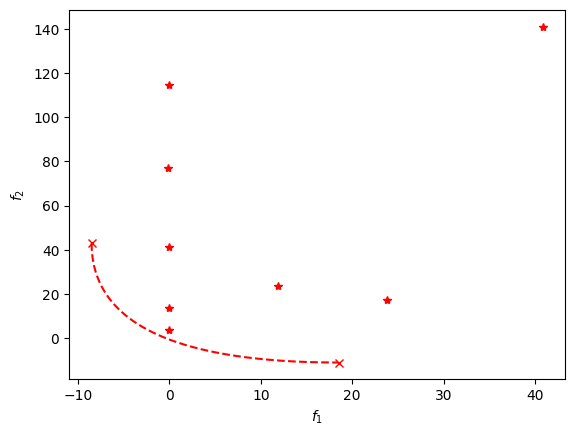

In [ ]:
n = 1000
x = np.linspace(-4, 2, n)
y = -x-1

def f1(x,y):
  return x**2/4 + y**2/2 + 2*x -3*y

def f2(x,y):
  return x**2/2 + y**2 - 2*x + 6*y

plt.plot(f1(x,y),f2(x,y),"--",color="red")
plt.plot(f1(-4,3),f2(-4,3),'x',color="red")
plt.plot(f1(2,-3),f2(2,-3),'x',color="red")

plt.plot(f1(-9.1,5),f2(-9.1,5),"*",color="red")
plt.plot(f1(-9.5,1.7),f2(-9.5,1.7),"*",color="red")
plt.plot(f1(-7.5,-0.3),f2(-7.5,-0.3),"*",color="red")
plt.plot(f1(-4.5,-1.1),f2(-4.5,-1.1),'*',color="red")
plt.plot(f1(-2.6,-1),f2(-2.6,-1),'*',color="red")

plt.plot(f1(-5,-5),f2(-5,-5),'*',color="red")
plt.plot(f1(7.5,8.7),f2(7.5,8.7),'*',color="red")
plt.plot(f1(5,2.5),f2(5,2.5),'*',color="red")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()

### Ótimo de Pareto

Uma solução viável $\mathbf{x^*} \in \mathcal{F}$ é chamada um ótimo de Pareto para um problema de otimização multiobjetivo se não existir um outro vetor solução viável em $\mathcal{F}$ que domine $\mathbf{x^*}$. Em outras palavras, **soluções ótimas são aquelas que não são dominadas por outras soluções**.

Diferentemente da otimização monoobjetivo, onde uma única solução ótima nos interessa, em problemas multiobjetivo a otimização nos leva um conjunto de soluções, chamada de **conjunto de ótimos de Pareto** (ou conjunto Pareto-ótimo) $\mathcal{P^*} \subset \mathcal{F}$, formado inteiramente por vetores solução não-dominados. A imagem deste conjunto **no espaço de objetivo é chamada de fronteira de Pareto** (a linha vermelha tracejada é a fronteira de Pareto do problema de exemplo).

Formalmente dizemos que o conjunto de ótimos de Pareto é $\mathcal{P^*} = \{ x \in \mathcal{F} \; | \; \nexists \mathbf{x'} \in \mathcal{F}: \mathbf{x'} \prec \mathbf{x} \}$

## Encontrado soluções

A identificação da fronteira de Pareto não é uma tarefa fácil, já que podem ser curvas complexas, mesmo para dois objetivos. Para três objetivos teremos superfícies de Pareto, o que adiciona um maior grau de liberdade a esta complexidade. Por esse motivo, a otimização multiobjetivo é particularmente difícil de solucionar. Adicionam dificuldade também o fato de não termos ferramentas eficientes (em termos de tempo computacional) para encontrar estas soluções.

Na prática, há três formas de lidar com problemas multiobjetivo:
1. Método da função de utilidade monoobjetivo;
2. Método da $\epsilon$-restrição ($\epsilon$-*constraint*); e
3. Aproximação do conjunto Pareto-ótimo, por meio de metaheuristicas.

A seguir discutiremos os métodos relacionados às formas 1 e 2. O método 3 será discutido em outros materiais.

Outro aspecto a ser destacado é que, mesmo que tenhamos múltiplas soluções Pareto-ótimas de alta qualidade, <u>a escolha final de qual solução será usada é deixada para o tomador de decisão</u> que possui informação de alto nível que pode ajudar na escolha de quais compromissos fazer. Esse tipo de informação de alto nível é, geralmente, não técnica, informal, imprecisa, altamente subjetiva e não é parte do problema de otimização.

Tudo isso significa que o resultado final da otimização multiobjetivo (e mesmo alguns aspectos dos métodos de solução que veremos a seguir) deve ser determinado com base nas informações alimentadas pelo tomador de decisão.

### Método da função de utilidade monoobjetivo

Nós já falamos sobre esta ideia quando discutimos o Exemplo 1. Aqui iremos desenvolver um pouco mais esta abordagem.

Para transformar um problema de otimização multiobjetivo em um problema monoobjetivo, nós reescrevemos o problema original, <u>combinando as funções objetivo</u>. Normalmente combinamos as funções $f_1,\ldots,f_M$ em uma função de utilidade $\mathcal{U}(\mathbf{f}): \mathcal{S} \rightarrow \mathbb{R}$ que pode ser construída de diferentes maneiras. Considerando apenas duas funções objetivo $f_1$ e $f_2$, temos a seguinte lista não exaustiva de exemplos:

1. $\mathcal{U}(f_1,f_2) = kf_1^{\alpha}f_2^{\beta}$
2. $\mathcal{U}(f_1,f_2) = {\alpha}f_1 + {\beta}f_2 + [1-(\alpha+\beta)]f_1f_2$
3. $\mathcal{U}(f_1,f_2) = f_1f_2$
4. $\mathcal{U}(f_1,f_2) = f_1/f_2$
5. $\mathcal{U}(f_1,f_2) = {\alpha}f_1 + {\beta}f_2$

onde $k$, $\alpha$ e $\beta$ são parâmetros que devem ser escolhidos de modo que a função de utilidade caracterize melhor o problema em estudo.

A multiplicidade de opções para construção da função de utilidade e mesmo a adição de mais funções objetivo tornam o uso desta técnica uma tarefa complexa. Certo é que esta <u>escolha está intimamente associada ao domínio de aplicação</u> do problema de otimização, sendo <u>a expertise do tomador de decisão um elemento fundamental para a escolha da função</u> (vide que no caso do Exemplo 1, a escolha pela função de utilidade do tipo 4 foi bastante óbvia para quem conhece o tipo das variáveis envolvidas no problema).

Certamente existem conceitos e técnicas da matemática que podem ajudar na escolha das funções e de seus parâmetros. Por exemplo, sabe-se que deve-se preferir, na escolha da função de utilidade $\mathcal{U}(\mathbf{f})$, funções que sejam monótonas e convexas, já que este tipo de função tem análise mais fácil. Contudo, este assunto está além do escopo deste material. Uma brevíssima introdução pode ser encontrada no Capítulo 14 do livro <a href=https://amzn.to/3MFyaYf>Nature-Inspired Optimization Algorithms</a> de Xin-She Yang.

Iremos aqui investigar com maior cuidado uma das formas listadas acima: a soma ponderada das funções (tipo 5).

#### Soma ponderada

A função de utilidade baseada na soma ponderada é uma das formas mais populares de combinar objetivos em uma única função. Esta função de utilidade pode ser descrita genericamente por

$\mathcal{U}(\mathbf{f(x)}) = \sum_{i=1}^{M} w_if_i(\mathbf{x})$

onde $w_i \in [0,1]$ é o peso associado a cada função e $\sum_{i=1}^M w_i = 1$.

O novo problema passa a ser então

$
\displaystyle\min_{\boldsymbol{x} \in \mathbb{R}^D} \mathcal{U}(\mathbf{f(x)}) \\
s.t. \\
g_j(\mathbf{x}) \leq 0, \; j = 1,2,\ldots,J \\
h_k(\mathbf{x}) = 0, \; k = 1,2,\ldots,K
$

Após a transformação o processo de solução consiste em selecionar algum método de solução de problemas monoobjetivo que seja adequado ao novo problema. Uma vantagem desta função de utilidade é ser bastante fácil de manipular, o que a torna interessante em problemas não lineares.

A técnica não limita que a soma ponderada seja linear, podendo assumir, por exemplo uma forma quadrática:

$\mathcal{U}(\mathbf{f(x)}) = \sum_{i=1}^{M} w_if_i^2(\mathbf{x})$

O fato é que não há um guia fácil para como escolher a melhor forma para um determinado problema. Mas certamente, se não há outra informação de alto nível associada ao problema, a combinação linear deve ser empregada por ser a de mais fácil análise e manipulação.

Contudo, a principal questão que surge no uso desta função de utilidade é: **qual peso devemos escolher para cada função?** A pergunta é pertinente porque o novo problema não é necessariamente equivalente ao problema multiobjetivo original já que os pesos, que impactam fortemente a solução que encontraremos, podem ser escolhidos arbitrariamente.

Por isso, a **escolha dos pesos é essencialmente uma tarefa para os tomadores de decisão** de modo a escolher uma ordem de preferência para cada objetivo.

#### Exemplo 3

Vamos considerar novamente o problema de minimizar as funções abaixo:

$f_1(x,y) = \frac{x^2}{4} + \frac{y^2}{2} + 2x -3y \\
f_2(x,y) = \frac{x^2}{2} + y^2 - 2x +6y$



Podemos criar a seguinte função de utilidade que combina linearmente as funções $f_1$ e $f_2$ e que iremos **minimizar**:

$\mathcal{U}(f_1(x,y),f_2(x,y)) = w_1(\frac{x^2}{4} + \frac{y^2}{2} + 2x -3y) + w_2(\frac{x^2}{2} + y^2 - 2x +6y)$

Como esta é uma função não-linear quadrática iremos encontrar seu ponto de mínimo analiticamente de forma direta, para tanto devemos fazer:

$ \frac{\partial \mathcal{U}(f_1(x,y),f_2(x,y))}{\partial x} = 0  \\
 \frac{\partial \mathcal{U}(f_1(x,y),f_2(x,y))}{\partial y} = 0$

Logo temos

$ (\frac{w_1}{2} + w_2)x + 2w_1 - 2w_2 = 0  \\
 (w_1 + 2w_2)y -3w_1 + 6w_2 = 0$

E finalmente

$ x = \frac{2w_2 - 2w_1}{\frac{w_1}{2} + w_2} \\
 y = \frac{3w_1 - 6w_2}{(w_1 + 2w_2)}$

Como $w_2 = 1 - w_1$, temos que

$ x = \frac{2 -4w_1}{1 - \frac{w_1}{2}} \\
 y = \frac{9w_1 - 6}{(2 -w_1)}$

Assim, como $w_1 \in [0,1]$ temos que $x \in [-4;2]$ e $y \in [-3;3]$. Observe que os pontos $(-4;3)$ e $(2;-3)$ são justamente os pontos de mínimo das funções $f_1$ e $f_2$, respectivamente, e neste caso o valor de $w_1$ controla o passeio que fazemos sobre o conjunto ótimos de Pareto $\mathcal{P^*}$.

A figura abaixo ilustra este conceito. Nela mostramos novamente os gráficos de contorno de cada função e a linha vermelha tracejada que é o conjunto de ótimos de Pareto do problema. A figura mostra ainda, com asteriscos vermelhos, 10 soluções obtidas pela variação de $w_1$.

Valores do peso w1: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


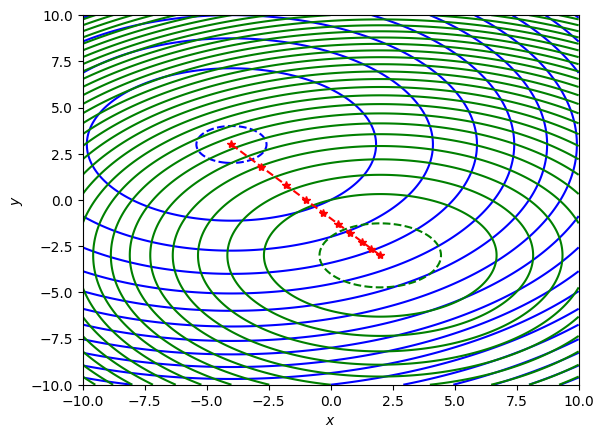

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = 1000
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
xv, yv = np.meshgrid(x, y)
f1 = xv**2/4 + yv**2/2 + 2*xv -3*yv
f2 = xv**2/2 + yv**2 - 2*xv + 6*yv

plt.contour(x,y,f1,levels=20,colors="blue")
plt.contour(x,y,f2,levels=30,colors="green")

plt.plot([-4,2],[3,-3],'--',color="red")

w1 = np.linspace(0, 1, 10)
print("Valores do peso w1:",w1)
x = (2-4*w1)/(1-(w1/2))
y = (9*w1-6)/(2-w1)

plt.plot(x,y,'*',color="red")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Abaixo mostramos como a variação de $w_1$ percorre a fronteira de Pareto.

O ponto mais extremo (canto superior esquerdo) indica o caso quando $w_1=1$, neste caso damos todo o peso da função de utilidade para $f_1$ e, por isso, estamos exatamanete sobre o ponto de mínimo da função $f_1$. Quando $w_1 = 0$, temos que o mínimo da função de utilidade será o mínimo de $f_2$.

Por meio deste exemplo podemos ver que somente o tomador de decisão, munido de informações de alto nível, pode determinar a solução ótima de interesse dentro da Fronteira de Pareto.

Valores do peso w1: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
Valores de f1: [18.5        15.41695502 12.171875    8.78        5.2755102   1.72485207
 -1.75       -4.92975207 -7.42       -8.5       ]
Valores de f2: [-11.         -10.81314879 -10.15625     -8.84        -6.59183673
  -3.01183432   2.5         10.8677686   23.56        43.        ]


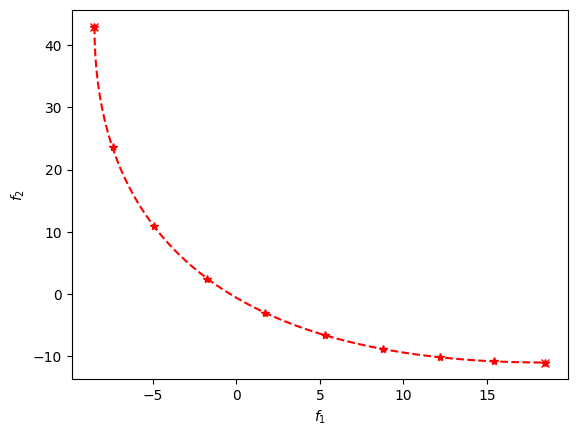

In [ ]:
n = 1000
x = np.linspace(-4, 2, n)
y = -x-1

def f1(x,y):
  return x**2/4 + y**2/2 + 2*x -3*y

def f2(x,y):
  return x**2/2 + y**2 - 2*x + 6*y

plt.plot(f1(x,y),f2(x,y),"--",color="red")
plt.plot(f1(-4,3),f2(-4,3),'x',color="red")
plt.plot(f1(2,-3),f2(2,-3),'x',color="red")

w1 = np.linspace(0, 1, 10)
print("Valores do peso w1:",w1)
x = (2-4*w1)/(1-(w1/2))
y = (9*w1-6)/(2-w1)

print("Valores de f1:",f1(x,y))
print("Valores de f2:",f2(x,y))

plt.plot(f1(x,y),f2(x,y),'*',color="red")


plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.show()

#### Críticas

Ao usar esta técnica nós aceitamos perder alguma informação em troca de dois ganhos principais:

1. um resultado único: que pode ser usado de forma automática em um sistema;
2. menor tempo de solução: por meio do uso de técnicas monoobjetivo eficientes.

A perda de informação está no fato de que a função de utilidade, seja qual for, estabelece uma relação entre as funções objetivo e pode deixar de encontrar soluções cuja análise poderia revelar compromissos não detectados pelo tomador de decisão. Em outras palavras, **a função de utilidade codifica, em uma expressão matemática, a informação de alto nível do tomador de decisão**, mas pode inviabilizar a descoberta de soluções da fronteira de Pareto que poderiam ser ainda melhores, por contemplar aspectos que não foram codificados.

Além disso, **gerar um conjunto de pontos que sejam uniformemente distribuídos na fronteira de Pareto não é trivial**. Vide na figura anterior, como os pontos não são igualmente distribuídos sobre a curva. Em outras palavras, uma variação regular de $w_i$ conduziu a uma amostragem irregular da fronteira de Pareto.

Outra desvantagem do método é que ele **não será capaz de gerar soluções caso a fronteira de Pareto seja não-convexa**, como mostra a figura abaixo.

Por isso, deve-se ponderar bem sobre estas vantagens e desvantagens, antes do uso do método da transformação.

Mais sobre este assunto pode ser encontrado em: https://link.springer.com/article/10.1007/s00158-009-0460-7

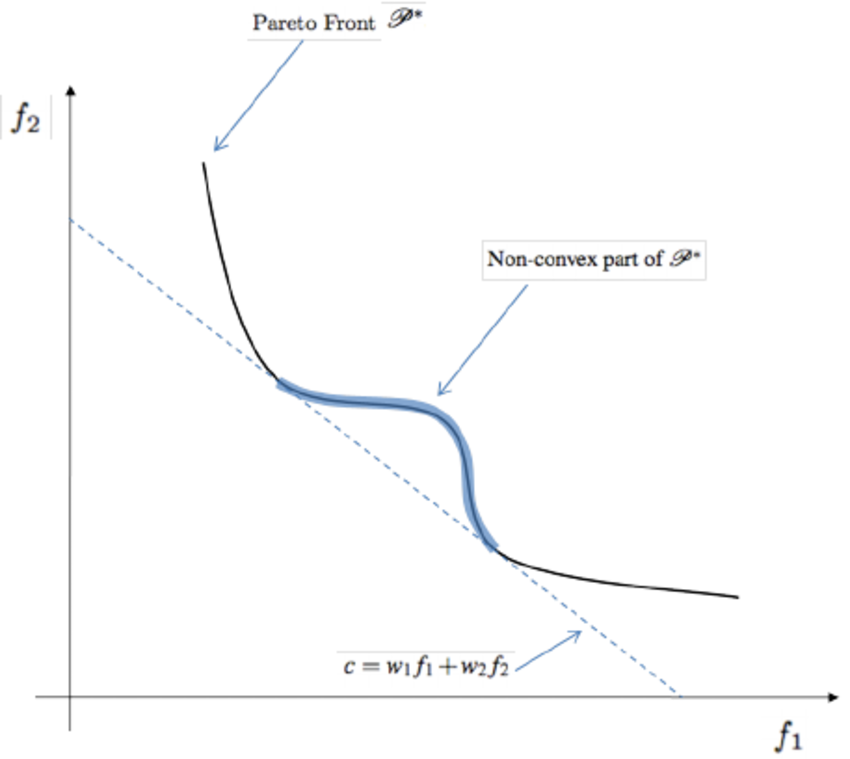

### Método da $\epsilon$-restrição

Uma forma alternativa de lidar com problemas de otimização multiobjetivo é escolher um dos objetivos para continuar sendo um objetivo e reescrever todos demais objetivos como restrições do problema. Assim, no problema abaixo

$
\displaystyle\min_{\boldsymbol{x} \in \mathbb{R}^D} \boldsymbol{f}(\mathbf{x}) = [f_1(\mathbf{x}),f_2(\mathbf{x}),\ldots,f_M(\mathbf{x})]
$

tomamos uma das funções $f_q$ como a função objetivo (geralmente escolhemos aquela que é mais importante na preferência do tomador de decisão) e impomos limites aos outros objetivos, desta forma temos

$
\displaystyle\min_{\boldsymbol{x} \in \mathbb{R}^D} f_q(\mathbf{x}) \\
s.t. \\
f_i(\mathbf{x}) \leq \epsilon_i \; i = 1,2,\ldots,q-1,q+1,\ldots,M
$

Conhecendo-se $\epsilon_i$, o problema acima pode ser resolvido por técnicas de solução de problemas monoobjetivo. Em essência, estamos fatiando o espaço objetivo $\mathcal{S}$ em diferentes subdomínios e podemos variar este fatiamento modificando $\epsilon_i$.

A figura abaixo ilustra o caso onde escolhemos $f_1(\mathbf{x})$ como função objetivo e fazemos $f_2(\mathbf{x}) \leq \epsilon_2$ como restrição. Para um valor qualquer de $\epsilon_2 = \delta_1$, o espaço objetivo é dividido em dois subdomínios: $f_2(\mathbf{x}) \leq \delta_1$ (viável) e $f_2(\mathbf{x}) \gt \delta_2$ (inviável). A minimização de $f_1(\mathbf{x})$ na região viável leva a um ótimo global no ponto A. Similarmente, para um valor diferente de $\epsilon_2 = \delta_2$, o mínimo de $f_1(\mathbf{x})$ é o ponto B.

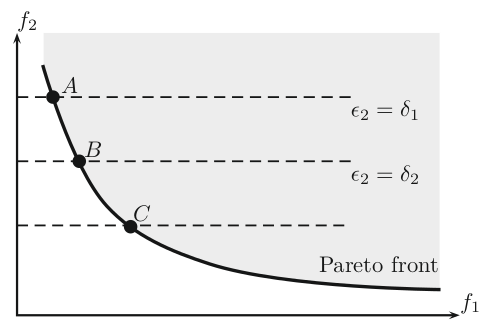

#### Procedimento geral

O procedimento abaixo usa a abordagem da $\epsilon$-restrição para estimar a fronteira de Pareto e o respectivo conjunto de ótimos de Pareto em um problema multiobjetivo de minimização.

> Escolha $f_q$ \\
> Escolha $n \in \mathbb{N^*}$, que é o número de subdivisões do domínio que será feita em cada função que será usada como restrição \\
> Para cada $f_i$ ($i \neq q$) determine o intervalo $[\delta_i^{min},\delta_i^{max}]$ e o conjunto de valores $\Delta_i = \{\delta_i^{1},\ldots,\delta_i^{n}\}$, com base no valor de $n$. O conjunto $\Delta_i$ contém os valores que $\epsilon_i$ vai assumir \\
> Faça o produto cartesiano $\mathcal{C} = \Delta_1 \times \Delta_2 \times \ldots \times \Delta_{q-1} \times \Delta_{q+1} \times \ldots \times \Delta_M$ \\
> Para cada $\mathbf{c} \in \mathcal{C}$ faça \\
>> Resolva o problema monobjetivo $
\displaystyle\min_{\boldsymbol{x} \in \mathbb{R}^D} f_q(\mathbf{x}) \\
s.t. \\
f_i(\mathbf{x}) \leq  c_i , \; \; i = 1,2,\ldots,q-1,q+1,\ldots,M
$ \\
>> Armazene $\mathbf{x^*}$ e $\mathbf{f^*}$, que são, respectivamente, uma solução do conjunto de ótimos de Pareto e um ponto na fronteira de Pareto


Como se pode ver, este procedimento é bastante intensivo computacionalmente. Já que iremos resolver $n^{M-1}$ problemas de otimização. Assim, quanto maior o valor de $n$, teremos uma melhor cobertura da fronteira de Pareto, mas a um custo computacional maior.

#### Exemplo 4

Vamos considerar novamente o problema de minimizar as funções abaixo:

$f_1(x,y) = \frac{x^2}{4} + \frac{y^2}{2} + 2x -3y \\
f_2(x,y) = \frac{x^2}{2} + y^2 - 2x +6y$

Neste caso escolheremos $f_1(x,y)$ como a função objetivo que queremos minimizar e tomaremos $f_2(x,y)$ como uma restrição.

Escolheremos um valor para $n$, neste caso usaremos $n=20$.

Uma das dificuldades deste método é determinar o intervalo $[\delta_2^{min},\delta_2^{max}]$. Uma abordagem para esta escolha pode ser resolver dois problemas monoobjetivo: no primeiro, minizamos sobre $f_1(x,y)$ somente, obtemos $(x^*,y^*)$ e fazemos $\delta_2^{max} =  f_2(x^*,y^*)$; no segundo, minizamos sobre $f_2(x,y)$ somente e fazemos $\delta_2^{min} =  f_2(x^*,y^*)$.

Com base em $n$ e no intervalo $[\delta_2^{min},\delta_2^{max}]$ determinamos o conjunto $\Delta_2$ e o conjunto $\mathcal{C} = \Delta_2$.

A seguir resolvemos $n$ problemas monoobjetivo minimizando $f_1$ e usando a restrição $f_2(x,y) \leq \epsilon_2$. Em cada problema $\epsilon_2$ assume um dos valores de $\Delta_2$.





Minimizando em f1 para encontrar delta2_max
(x*,y*) = ( -4.000000000001319 , 3.0000000000013194 )
f1 = -8.499999999999996
f2 = 43.000000000023746 = delta2_max

Minimizando em f2 para encontrar delta2_min
(x*,y*) = ( 2.0 , -3.0 )
f1 = 18.5
f2 = -11.0 = delta2_min
Delta_2: [-11.          -8.15789474  -5.31578947  -2.47368421   0.36842105
   3.21052632   6.05263158   8.89473684  11.73684211  14.57894737
  17.42105263  20.26315789  23.10526316  25.94736842  28.78947368
  31.63157895  34.47368421  37.31578947  40.15789474  43.        ]


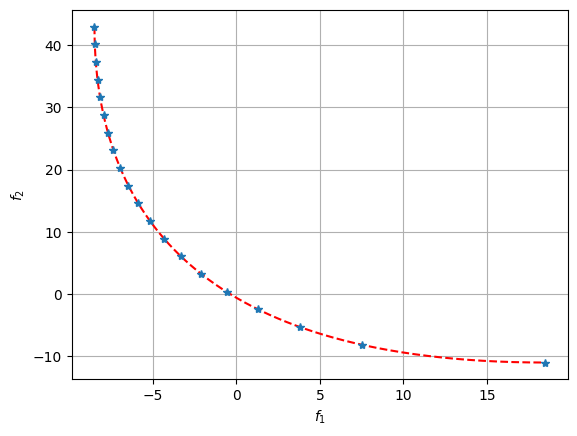

In [ ]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np

#determinando o valor de n
n = 20

#Organizando o modelo para determinar delta2_min e delta2_max
model = ConcreteModel()

model.x = Var(within=Reals)
model.y = Var(within=Reals)

model.f1 = Var()
model.f2 = Var()
model.C_f1 = Constraint(expr= model.f1 == (model.x**2)/4 + (model.y**2)/2 + 2*model.x - 3*model.y)
model.C_f2 = Constraint(expr= model.f2 == (model.x**2)/2 + model.y**2 - 2*model.x + 6*model.y)

model.O_f1 = Objective(expr= model.f1  , sense=minimize)
model.O_f2 = Objective(expr= model.f2  , sense=minimize)

# Determinando delta2_max
model.O_f2.deactivate()

solver = SolverFactory('baron', executable="/content/baron-lin64/baron")
solver.solve(model)

print("Minimizando em f1 para encontrar delta2_max")
print( '(x*,y*) = ( ' + str(value(model.x)) + ' , ' + str(value(model.y)) + ' )')
print( 'f1 = ' + str(value(model.f1)) )
print( 'f2 = ' + str(value(model.f2)) + ' = delta2_max' )
delta2_max = value(model.f2)


# Determinando delta2_min
model.O_f2.activate()
model.O_f1.deactivate()

solver = SolverFactory('baron', executable="/content/baron-lin64/baron")
solver.solve(model)

print()
print("Minimizando em f2 para encontrar delta2_min")
print( '(x*,y*) = ( ' + str(value(model.x)) + ' , ' + str(value(model.y)) + ' )')
print( 'f1 = ' + str(value(model.f1)) )
print( 'f2 = ' + str(value(model.f2)) + ' = delta2_min' )
delta2_min = value(model.f2)

# Reorganizando o modelo para aplicação do método ϵ -restrição
model.O_f1.activate()
model.O_f2.deactivate()

model.e = Param(initialize=0, mutable=True)

model.C_epsilon = Constraint(expr = model.f2 <= model.e)

solver = SolverFactory('baron', executable="/content/baron-lin64/baron")
solver.solve(model)


Delta_2 = np.linspace(delta2_min,delta2_max,n)
print("Delta_2:",Delta_2)

f1_l = []
f2_l = []
for i in Delta_2:
    model.e = i
    solver.solve(model);
    f1_l.append(value(model.f1))
    f2_l.append(value(model.f2))

#Gráfico da fronteira de Pareto

n = 1000
x = np.linspace(-4, 2, n)
y = -x-1

def f1(x,y):
  return x**2/4 + y**2/2 + 2*x -3*y

def f2(x,y):
  return x**2/2 + y**2 - 2*x + 6*y

plt.plot(f1(x,y),f2(x,y),"--",color="red")
plt.plot(f1_l,f2_l,'*')
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.grid(True)
plt.show()

E como seria o comportamento se tivessemos escolhido $f_2(x,y)$ como função objetivo?

Abaixo mostramos o comportamento da fronteira de Pareto neste caso. Como se pode ver das figuras, as distribuições dos pontos na fronteira são diferentes, embora sejam similares.

Minimizando em f2 para encontrar delta1_max
(x*,y*) = ( 2.0 , -3.0 )
f1 = 18.5 = delta1_max
f2 = -11.0

Minimizando em f1 para encontrar delta1_min
(x*,y*) = ( -3.9999999997565827 , 2.999999999757715 )
f1 = -8.5 = delta1_min
f2 = 42.99999999563204
Delta_1: [-8.5        -7.07894737 -5.65789474 -4.23684211 -2.81578947 -1.39473684
  0.02631579  1.44736842  2.86842105  4.28947368  5.71052632  7.13157895
  8.55263158  9.97368421 11.39473684 12.81578947 14.23684211 15.65789474
 17.07894737 18.5       ]


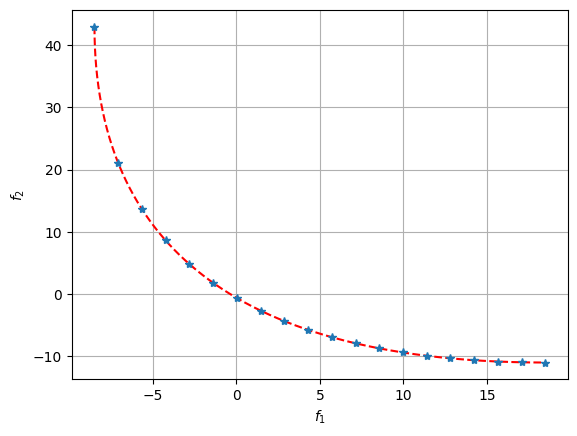

In [ ]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np

#determinando o valor de n
n = 20

#Organizando o modelo para determinar delta1_min e delta1_max
model = ConcreteModel()

model.x = Var(within=Reals)
model.y = Var(within=Reals)

model.f1 = Var()
model.f2 = Var()
model.C_f1 = Constraint(expr= model.f1 == (model.x**2)/4 + (model.y**2)/2 + 2*model.x - 3*model.y)
model.C_f2 = Constraint(expr= model.f2 == (model.x**2)/2 + model.y**2 - 2*model.x + 6*model.y)

model.O_f1 = Objective(expr= model.f1  , sense=minimize)
model.O_f2 = Objective(expr= model.f2  , sense=minimize)

# Determinando delta1_max
model.O_f1.deactivate()

solver = SolverFactory('baron', executable="/content/baron-lin64/baron")
solver.solve(model)

print("Minimizando em f2 para encontrar delta1_max")
print( '(x*,y*) = ( ' + str(value(model.x)) + ' , ' + str(value(model.y)) + ' )')
print( 'f1 = ' + str(value(model.f1)) + ' = delta1_max' )
print( 'f2 = ' + str(value(model.f2))  )
delta1_max = value(model.f1)


# Determinando delta1_min
model.O_f1.activate()
model.O_f2.deactivate()

solver = SolverFactory('baron', executable="/content/baron-lin64/baron")
solver.solve(model)

print()
print("Minimizando em f1 para encontrar delta1_min")
print( '(x*,y*) = ( ' + str(value(model.x)) + ' , ' + str(value(model.y)) + ' )')
print( 'f1 = ' + str(value(model.f1))  + ' = delta1_min' )
print( 'f2 = ' + str(value(model.f2)) )
delta1_min = value(model.f1)

# Reorganizando o modelo para aplicação do método ϵ -restrição
model.O_f2.activate()
model.O_f1.deactivate()

model.e = Param(initialize=0, mutable=True)

model.C_epsilon = Constraint(expr = model.f1 <= model.e)

solver = SolverFactory('baron', executable="/content/baron-lin64/baron")
solver.solve(model)


Delta_1 = np.linspace(delta1_min,delta1_max,n)
print("Delta_1:",Delta_1)

f1_l = []
f2_l = []
for i in Delta_1:
    model.e = i
    solver.solve(model);
    f1_l.append(value(model.f1))
    f2_l.append(value(model.f2))

#Gráfico da fronteira de Pareto

n = 1000
x = np.linspace(-4, 2, n)
y = -x-1

def f1(x,y):
  return x**2/4 + y**2/2 + 2*x -3*y

def f2(x,y):
  return x**2/2 + y**2 - 2*x + 6*y

plt.plot(f1(x,y),f2(x,y),"--",color="red")
plt.plot(f1_l,f2_l,'*')
plt.xlabel("$f_1$")
plt.ylabel("$f_2$")
plt.grid(True)
plt.show()

#### Críticas

A principal vantagem deste método é que **ele trabalha bem em problema complexos com fronteiras de Pareto não convexas**.

Entretanto, há desvantagens, já que existem diferentes formulações possíveis para escolha como objetivo principal. Diferentes **formulações podem levar a uma reconstrução diferente da fronteira de Pareto e têm, ao mesmo tempo, esforço computacional diferente**.

Há ainda a dificuldade de estabelecer os limites do intervalo de valores será usado em cada $\epsilon_i$, bem como o fato de que o número de partições no intervalo aumenta bastante o tempo de execução do algoritmo.

Além disso, **não há garantia que a cobertura dos pontos na fronteira serão uniformemente distribuídos**.


Uma implementação mais eficiente deste algoritmo pode ser encontrada em [Effective implementation of the ε-constraint method in Multi-Objective Mathematical Programming problems](https://www.sciencedirect.com/science/article/pii/S0096300309002574?casa_token=xypUdl5iVqMAAAAA:OJdjau9PdV-CU95jcrLf_jn0d1XnXYJJk6BS89SHfqt7QRaIVsX2j68snjFY2KNL8EKnV4kTPdE). Aqui a [implementação em Python](https://stackoverflow.com/questions/50742999/multi-objective-optimization-example-pyomo)